# Arbitrary Value Imputation

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
# load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# create a new feature 'family' by combining 'sibsp' and 'parch'
df['family'] = df['sibsp']+ df['parch']

In [4]:
# select relevant columns
df = df[['age', 'fare', 'family', 'survived']]

In [5]:
# display the first few rows of the dataframe
df.head()

,age,fare,family,survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [96]:
# Randomly select 5% of the dataset and set fare to NaN
df.loc[df.sample(frac=0.05, random_state=42).index, "fare"] = np.nan

In [6]:
# check the proportion of missing values in each column
df.isnull().mean()

age         0.198653
fare        0.000000
family      0.000000
survived    0.000000
dtype: float64

In [7]:
# split the data into features and target variable
X = df.drop(columns=['survived'])
y = df['survived']

In [8]:
# split the data into training and testing sets
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
# check the shape of train and test sets
X_train.shape ,X_test.shape

((712, 3), (179, 3))

In [10]:
# Arbitrary value imputation
X_train['age_99'] = X_train['age'].fillna(99)
X_train['age_minus1'] = X_train['age'].fillna(-1)

X_train['fare_999'] = X_train['fare'].fillna(999)
X_train['fare_minus1'] = X_train['fare'].fillna(-1)

In [11]:
# compare the variance of the original and imputed variables
print('Orignal age variable variance:', X_train['age'].var())
print('Age variance after 99 imputation:', X_train['age_99'].var())
print('Age variance after -1 imputation:', X_train['age_minus1'].var())

print('Orignal fare variable variance:', X_train['fare'].var())
print('Fare variance after 99 imputation', X_train['fare_999'].var())
print('Fare variance after -1 imputation:', X_train['fare_minus1'].var())

Orignal age variable variance: 204.34951339046142
Age variance after 99 imputation: 951.7275570187188
Age variance after -1 imputation: 318.0896202624488
Orignal fare variable variance: 2368.2468324201327
Fare variance after 99 imputation 2368.2468324201327
Fare variance after -1 imputation: 2368.2468324201327


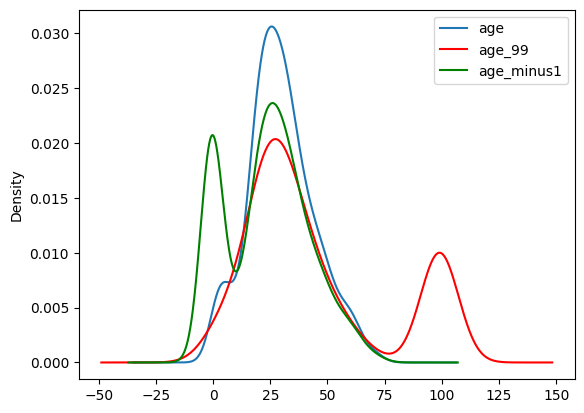

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
X_train['age'].plot(kind='kde', ax=ax)

#variable imputed with median
X_train['age_99'].plot(kind='kde', ax=ax, color='red')
X_train['age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

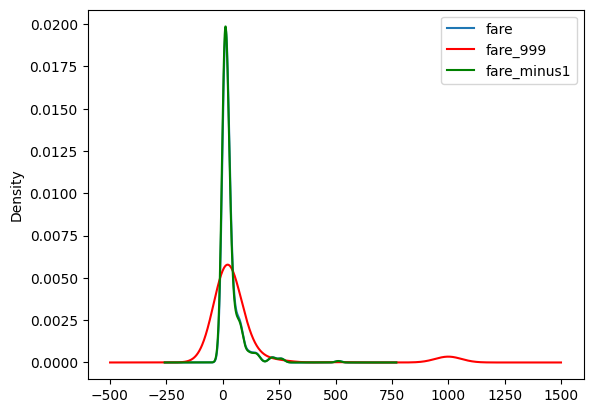

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
X_train['fare'].plot(kind='kde', ax=ax)

#variable imputed with median
X_train['fare_999'].plot(kind='kde', ax=ax, color='red')
X_train['fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels= ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [12]:
# calculate covariance matrix
X_train.cov()

,age,fare,family,age_99,age_minus1,fare_999,fare_minus1
age,204.349513,71.512440,-6.498901,204.349513,204.349513,71.512440,71.512440
fare,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832
family,-6.498901,16.847264,2.735252,-7.387287,-4.149246,16.847264,16.847264
age_99,204.349513,-101.053412,-7.387287,951.727557,-189.535540,-101.053412,-101.053412
age_minus1,204.349513,126.761454,-4.149246,-189.535540,318.089620,126.761454,126.761454
fare_999,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832
fare_minus1,71.512440,2368.246832,16.847264,-101.053412,126.761454,2368.246832,2368.246832


In [13]:
# calculate correlation matrix
X_train.corr()

,age,fare,family,age_99,age_minus1,fare_999,fare_minus1
age,1.000000,0.095814,-0.299113,1.000000,1.000000,0.095814,0.095814
fare,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000
family,-0.299113,0.209323,1.000000,-0.144787,-0.140668,0.209323,0.209323
age_99,1.000000,-0.067310,-0.144787,1.000000,-0.344476,-0.067310,-0.067310
age_minus1,1.000000,0.146049,-0.140668,-0.344476,1.000000,0.146049,0.146049
fare_999,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000
fare_minus1,0.095814,1.000000,0.209323,-0.067310,0.146049,1.000000,1.000000


# Using Sklearn

In [14]:
# reset train test split to original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# define imputers with arbitrary values
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [16]:
# create column transformer to apply imputers
trf= ColumnTransformer([
    ('imputer1', imputer1, ['age']),
    ('imputer2', imputer2, ['fare'])
], remainder='passthrough')

In [17]:
# fit the transformer on training data
trf.fit(X_train)

C:\Users\FAHAD\AppData\Roaming\Python\Python313\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['fare'])])

In [18]:
# check the statistics learned by the imputers
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [19]:
# check the statistics learned by the imputers
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [20]:
# transform the training and testing data
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [114]:
X_train

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.1083,   2.    ],
       [ 14.    , 120.    ,   3.    ],
       [ 21.    ,  77.2875,   1.    ]])

In [21]:
# check for missing values in the transformed training data
np.isnan(X_train).sum()

np.int64(0)

In [23]:
# check for missing values in the transformed training data using pandas
X_train_df = pd.DataFrame(X_train, columns=['age','fare','family'])  # put your actual col names
X_train_df.isnull().sum()


age       0
fare      0
family    0
dtype: int64